In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import glob
import os
from FillBetween3d import fill_between_3d
import matplotlib_style
from matplotlib import patches
import seaborn as sns
import tensorflow as tf
from module.lib import layers, losses, regularizer
import cv2
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "browser"

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_76188/2354318869.py:7: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "trainsparent" which is no longer supported as of 3.3 and will become an error in 3.6



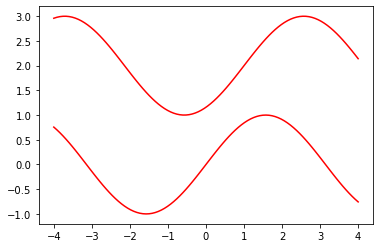

In [13]:
x = np.linspace(-4,4,100)
y1 = np.sin(x)
y2 = np.sin(x-1) + 2

plt.plot(x, y1, color="red")
plt.plot(x, y2, color="red")
plt.savefig("images/wave.png", trainsparent=True)

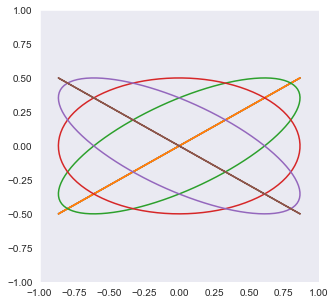

In [4]:
t = np.linspace(0, 2*np.pi, 100)
theta = np.pi/6
delta = np.arange(0, np.pi+0.001, np.pi/4)
E0 = np.exp(1.0j * t)
J = np.array([1, 0]).reshape((-1, 1))
K = np.array([0,1]).reshape((-1, 1))
Ein = E0 * (np.cos(theta) * J + np.sin(theta) * K)

plt.figure(figsize=(5,5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.plot(Ein[0,:].real, Ein[1,:].real)
for d in delta:
    cm = np.array([np.exp(-1.0j * d/2), np.exp(1.0j*d/2)]).reshape((-1, 1))
    Eout = Ein * cm
    plt.plot(Eout[0,:].real, Eout[1,:].real)
plt.grid(False)

In [13]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor'] = "none"
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z1 = np.linspace(0, 7.0*np.pi, 100)
z2 = np.linspace(z1[-1], z1[-1] + 4.0*np.pi, 100)
z3 = np.linspace(z2[-1], z2[-1] + 7.0*np.pi, 100)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.50 * E0
b = E0 - a
k = 0.3
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2-z2[0])/15)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2-z2[0])/15)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2[-1]-z2[0])/15)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2[-1]-z2[0])/15)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp

ax.plot(z, tot[1,:].real, tot[0,:].real, color="red")
set1 = [z, tot[1,:].real, tot[0,:].real]
set2 = [z, 0*tot[1,:].real, 0*tot[0,:].real]
fill_between_3d(ax, *set1, *set2, c="red", alpha=0.2)

rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2-z2[0])/15)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2-z2[0])/15)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2[-1]-z2[0])/15)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2[-1]-z2[0])/15)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp

ax.plot(z, tot[1,:].real + 2, tot[0,:].real, color="red")
set1 = [z, tot[1,:].real+2, tot[0,:].real]
set2 = [z, 0*tot[1,:].real+2, 0*tot[0,:].real]
fill_between_3d(ax, *set1, *set2, c="red", alpha=0.2)

x = [-1,1]
y = [-1,1]
X,Y = np.meshgrid(x,y)
One = np.ones_like(X)

alpha = 0.3
color1 = '#fde614'
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, -One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One, Y, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[0], X, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[-1], X, Y, alpha=alpha, color=color1)

color2 = "#441753"

ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y+2, One, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y+2, -One, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One+2, Y, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One+2, Y, alpha=alpha, color=color2)
ax.plot_surface(One * z2[0], X+2, Y, alpha=alpha, color=color2)
ax.plot_surface(One * z2[-1], X+2, Y, alpha=alpha, color=color2)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")

#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
ax.view_init(elev=35, azim=-38.5)
fig.savefig("images/fig1.png", transparent=True, dpi=300)

In [8]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor'] = "none"
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z1 = np.linspace(0, 5*np.pi, 100)
z2 = np.linspace(z1[-1], z1[-1] + 4.0*np.pi, 100)
z3 = np.linspace(z2[-1], z2[-1] + 7.0*np.pi, 100)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.50 * E0
b = E0 - a
k = 0.3
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))
tot = rcp1 + lcp1

#ax.plot(z1, tot[1,:].real, tot[0,:].real, color="red", label="RCP+LCP", lw=2)
#ax.plot(z1, rcp1[1,:].real, rcp1[0,:].real, color="blue", label="RCP", lw=2, alpha=1)
ax.plot(z1, lcp1[1,:].real, lcp1[0,:].real, color="green", label="LCP", lw=2, alpha=1)

#plt.legend(fontsize=16)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")
ax.set_box_aspect((1,1,1))

ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=0, azim=-123)
fig.savefig("images/fig1.png", transparent=True, dpi=300)

In [34]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor'] = "none"
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z1 = np.linspace(0, 8.0*np.pi, 200)
z2 = np.linspace(z1[-1], z1[-1] + 8.0*np.pi, 200)
z3 = np.linspace(z2[-1], z2[-1] + 8.0*np.pi, 200)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.4
b = 0.4
k = 0.5
kr=0.2
kl=0.5
n = 1.5
dn = 0.03
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n+dn)*(z2-z2[0])) * np.exp(-kr*(z2-z2[0])/10)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n-dn)*(z2-z2[0])) * np.exp(-kl*(z2-z2[0])/10)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n+dn)*(z2[-1]-z2[0])) * np.exp(-kr*(z2[-1]-z2[0])/10)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n-dn)*(z2[-1]-z2[0])) * np.exp(-kl*(z2[-1]-z2[0])/10)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot1 = rcp1 + lcp1
tot3 = rcp3 + lcp3

ax.plot(z1, tot1[1,:].real, tot1[0,:].real, color="red")
ax.plot(z2, rcp2[1,:].real - 0.5, rcp2[0,:].real, "b")
ax.plot(z2, lcp2[1,:].real + 0.5, lcp2[0,:].real, "g")
ax.plot(z3, tot3[1,:].real, tot3[0,:].real, color="red")
set1 = [z, tot[1,:].real, tot[0,:].real]
set2 = [z, 0*tot[1,:].real, 0*tot[0,:].real]
#fill_between_3d(ax, *set1, *set2, c="red", alpha=0.2)


x = [-1,1]
y = [-1,1]
X,Y = np.meshgrid(x,y)
One = np.ones_like(X)

alpha = 0.3
color1 = '#fde614'
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, -One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One, Y, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[0], X, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[-1], X, Y, alpha=alpha, color=color1)

ax.set_box_aspect((5,1,1))

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")

#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
ax.view_init(elev=32, azim=-163)
fig.savefig("images/fig1.png", transparent=True, dpi=400)

In [122]:
plt.plot(tot3[1,:].real, tot3[0,:].real)
plt.plot(rcp3[0,:].real, rcp3[1,:].real)
plt.plot(lcp3[0,:].real, lcp3[1,:].real)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect("equal")

In [6]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor'] = "none"
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z1 = np.linspace(0, 4.0*np.pi, 100)
z2 = np.linspace(z1[-1], z1[-1] + 4.0*np.pi, 100)
z3 = np.linspace(z2[-1], z2[-1] + 4.0*np.pi, 100)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.4
b = 0.4
kr = 0.1
kl = 0.4
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (z2-z2[0])/15) * np.exp(-kr*(z2-z2[0])/10)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * -(z2-z2[0])/15) * np.exp(-kl*(z2-z2[0])/10)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (z2[-1]-z2[0])/15) * np.exp(-kr*(z2[-1]-z2[0])/10)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * -(z2[-1]-z2[0])/15) * np.exp(-kl*(z2[-1]-z2[0])/10)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp
tot1 = rcp1 + lcp1
tot3 = rcp3 + lcp3

ax.plot(z, tot[1,:].real, tot[0,:].real, color="red")
ax.plot(z, rcp[1,:].real, rcp[0,:].real, alpha=0.5)
ax.plot(z, lcp[1,:].real, lcp[0,:].real, alpha=0.5)


x = [-1,1]
y = [-1,1]
X,Y = np.meshgrid(x,y)
One = np.ones_like(X)

alpha = 0.2
color1 = '#fde614'
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, -One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One, Y, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[0], X, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[-1], X, Y, alpha=alpha, color=color1)

ax.set_box_aspect((5,1,1))

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")

#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
ax.view_init(elev=0, azim=-90)
fig.savefig("images/fig1.png", transparent=True, dpi=300)

<IPython.core.display.Javascript object>

In [15]:
plt.figure(edgecolor="black")
plt.plot(tot3[1,:].real, tot3[0,:].real, color="red", lw=2, label="RCP+LCP")
plt.plot(rcp3[0,:].real, rcp3[1,:].real, color="orange", lw=2, label="RCP")
plt.plot(lcp3[0,:].real, lcp3[1,:].real, color="blue", lw=2, label="LCP")
#plt.gca().spines['bottom'].set_position(('data', 0))
#plt.gca().spines['left'].set_position(('data', 0))
#plt.gca().spines['left'].set_color('black')
#plt.gca().spines['bottom'].set_color('black')

plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect("equal")
plt.grid(False)
plt.xticks([],[])
plt.yticks([],[])
plt.savefig("images/fig2.png", transparent=True, dpi=300)

<IPython.core.display.Javascript object>

In [135]:
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(2, 1, figsize=(5,10))
axes[0].plot(rcp1[0,:].real, rcp1[1,:].real, label="RCP", alpha=0.5)
axes[0].plot(lcp1[0,:].real, lcp1[1,:].real, label="LCP", alpha=0.5)
axes[0].plot((rcp1+lcp1)[0,:].real, (rcp1+lcp1)[1,:].real, label="RCP+LCP")
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].set_aspect('equal')
axes[0].set_xlabel(r"$E_x$")
axes[0].set_ylabel(r"$E_y$")


axes[1].plot(rcp3[0,:].real, rcp3[1,:].real, alpha=0.5)
axes[1].plot(lcp3[0,:].real, lcp3[1,:].real, alpha=0.5)
axes[1].plot((rcp3+lcp3)[0,:].real, (rcp3+lcp3)[1,:].real)
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)
axes[1].set_aspect('equal')
axes[1].set_xlabel(r"$E_x$")
axes[1].set_ylabel(r"$E_y$")
fig.legend()
fig.tight_layout()
fig.savefig("images/test4.svg", dpi=300)

In [21]:
x = np.linspace(-5, 5, 100)
i = np.linspace(-5, 5, 100)

def f(x):
    return x**5 + -3*x**4 + -2*x**3 + x**2 + x -1

y = f(x)
g = f(i*1.0j)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, 0)
ax.plot(0*i, g, i)
ax.view_init(elev=90, azim=-90)

/Users/takumi/miniforge3/envs/tensorflow25/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_89130/542729083.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(img, ax=ax, shrink=0.8)


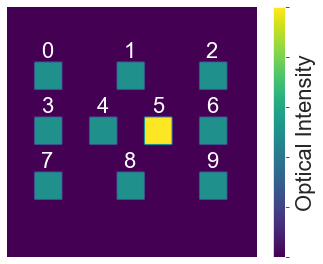

In [15]:
input_dim = (100, 100)
width = min(int(np.floor(input_dim[1] / 9.0)), int(np.floor(input_dim[0] / 7.0)))
height = min(int(np.floor(input_dim[1] / 9.0)), int(np.floor(input_dim[0] / 7.0)))

filter = np.zeros((input_dim[-2], input_dim[-1]), dtype='float32')
filter[2 * height:3 * height, width:2 * width] = 1.0
filter[2 * height:3 * height, 4 * width:5 * width] = 1.0
filter[2 * height:3 * height, 7 * width:8 * width] = 1.0
filter[4 * height:5 * height, 1 * width:2 * width] = 1.0
filter[4 * height:5 * height, 3 * width:4 * width] = 1.0
filter[4 * height:5 * height, 5 * width:6 * width] = 2.0
filter[4 * height:5 * height, 7 * width:8 * width] = 1.0
filter[6 * height:7 * height, width:2 * width] = 1.0
filter[6 * height:7 * height, 4 * width:5 * width] = 1.0
filter[6 * height:7 * height, 7 * width:8 * width] = 1.0


plt.rcParams["font.size"] = 22
fig, ax = plt.subplots(figsize=(5,5))
plt.axis("off")
img = ax.imshow(filter*0.5, cmap="viridis")
ax.text(13,20, "0", color="white")
ax.text(46,20, "1", color="white")
ax.text(79,20, "2", color="white")
ax.text(13,42, "3", color="white")
ax.text(35.5,42, "4", color="white")
ax.text(57.5,42, "5", color="white")
ax.text(79,42, "6", color="white")
ax.text(13,64, "7", color="white")
ax.text(46,64, "8", color="white")
ax.text(79,64, "9", color="white")
cbar = fig.colorbar(img, ax=ax, shrink=0.8)

cbar.set_label("Optical Intensity")
cbar.ax.set_yticklabels([])
fig.tight_layout()
plt.savefig("images/fig2.png", dpi=300)

In [8]:
(47.9/-27.5) * (217.3-201.3) + 93.8

65.9309090909091

In [1]:
images = np.load("data/data.npy")
images = images[:,::2,::2]
images.shape

NameError: name 'np' is not defined

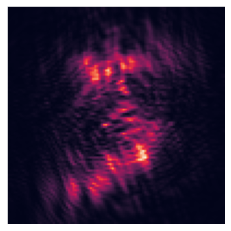

In [13]:
fig, ax = plt.subplots(1,1)
ax.imshow(images[:,:,50], cmap="rocket")
ax.set_aspect(1./ax.get_data_ratio())
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks([],color="None")
ax.set_yticks([],color="None")
fig.savefig("images/diff12.png", transparent=True, dpi=300)

In [77]:
X, Y, Z = np.mgrid[0:images.shape[0], 0:images.shape[1], 0:images.shape[2]]
X, Y, Z = X / np.max(X), Y/np.max(Y), Z/np.max(Z)

fig = go.Figure(data=go.Volume(
    x=-Z.flatten(),
    y=X.flatten(),
    z=-Y.flatten(),
    value=images.flatten(),
    isomin=0.,
    isomax=1.,
    opacity=0.1, # needs to be small to see through all surfaces
    surface_count=5, # needs to be a large number for good volume rendering
    ))
angle = np.pi / 4 # 45 degrees

name = 'vertical is along y+z'
camera = dict(
    eye=dict(x=2, y=2, z=2)
)

fig.update_layout(scene_camera=camera, scene_dragmode='orbit', title=name)
fig.show()

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_22813/3705326086.py:26: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



([], [])

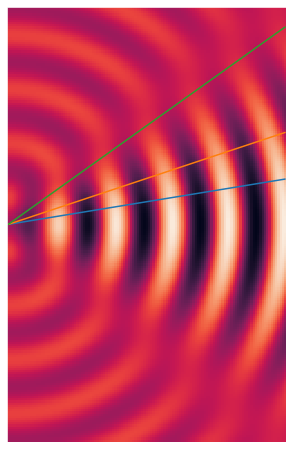

In [5]:
x = np.linspace(0, np.pi*10, 125)
y = np.linspace(-np.pi*8, np.pi*8, 200)

XX, YY = np.meshgrid(x, y)
R = np.sqrt(XX**2 + YY**2)
d2 = np.pi*3

domain1_y = np.linspace(-np.pi*4, -np.pi*3, 20)
domain2_y = np.linspace(-d2/2, d2/2, 20)
domain3_y = np.linspace(np.pi*3, np.pi*4, 20)
domain1 = np.zeros_like(R)
domain2 = np.zeros_like(R)
domain3 = np.zeros_like(R)

for y in domain1_y:
    domain1 = domain1 + np.cos(np.sqrt(XX**2 + (YY + y)**2))

for y in domain2_y:
    domain2 = domain2 + np.cos(np.sqrt(XX**2 + (YY + y)**2))

for y in domain3_y:
    domain3 = domain3 + np.cos(np.sqrt(XX**2 + (YY + y)**2))


plt.figure(figsize=(5, 8))
plt.pcolormesh(XX, YY, domain2, cmap="rocket")

fully_couple = np.arcsin(np.pi/(2*d2))
phi_order1 = np.arcsin(np.pi/d2)
phi_order2 = np.arcsin(2*np.pi/d2)
plt.plot(x, fully_couple*x)
plt.plot(x, phi_order1*x)
plt.plot(x, phi_order2*x)
plt.grid(False)
plt.xticks([])
plt.yticks([])
# plt.savefig("images/diff_pan.png", dpi=300)

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_55260/2935269242.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c)


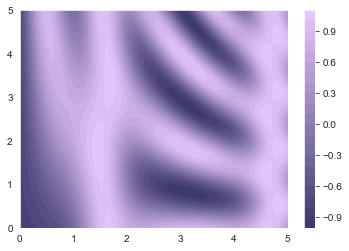

In [3]:
from matplotlib_style import cmap8
import numpy as np
import matplotlib.pyplot as plt
# データを作成する。

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 等高線を作成する。
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z, 20, cmap=cmap8)
fig.colorbar(c)

plt.show()

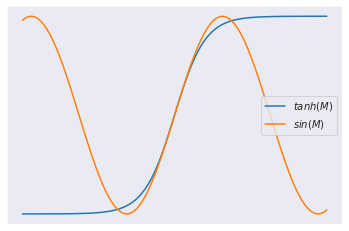

In [11]:
x = np.linspace(-5, 5, 100)
y1 = 2*np.tanh(x)
y2 = 2 * np.sin(x)

plt.figure(facecolor="#FFFFFF", edgecolor="#FFFFFF")
plt.plot(x, y1, label=r"$tanh(M)$")
plt.plot(x, y2, label=r"$sin(M)$")
plt.yticks([],[])
plt.xticks([],[])
plt.legend()

In [8]:
ax = plt.figure().add_subplot(projection='3d')
z1 = np.linspace(0, 7.0*np.pi, 100)
z2 = np.linspace(z1[-1], z1[-1] + 4.0*np.pi, 100)
z3 = np.linspace(z2[-1], z2[-1] + 7.0*np.pi, 100)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.50 * E0
b = E0 - a
k = 0.3
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2-z2[0])/15)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2-z2[0])/15)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2[-1]-z2[0])/15)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2[-1]-z2[0])/15)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp

ax.plot(tot[0,:].real, tot[1,:].real, z, color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

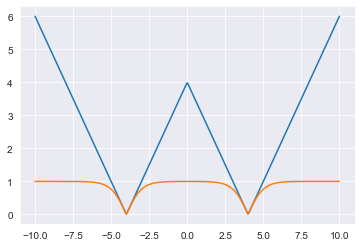

In [43]:
a = 4
x = np.linspace(-10, 10, 400)
y = np.abs(a-np.abs(x))
plt.plot(x, y)
plt.plot(x, np.abs(np.tanh(a-np.abs(x))))

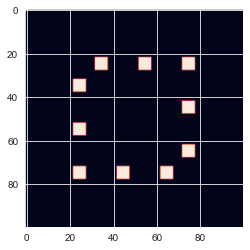

In [50]:
shape = (100, 100)
class_num = 10
area_size = 5
w = 50
h = 50
side = 2 * w + 2 * h
interval = side/class_num

p, q = -w/2, -h/2



x = np.arange(shape[1])
y = np.arange(shape[0])
XX, YY = np.meshgrid(x, y)
XX = XX - np.mean(XX)
YY = YY - np.mean(YY)
F = np.ones_like(R)
direction = np.array([1,0])

for i in range(class_num):
    if 0 <= interval*i < w:
        p = -w/2 + interval * i
        q = h/2
    elif w <= interval * i < w + h:
        p = w/2
        q = h/2 - (interval * i - w)
    elif w + h <= interval * i < 2*w + h:
        p = w/2 - (interval*i - w - h)
        q = -h/2
    elif 2*w + h <=interval*i < 2*w+2*h:
        p = -w/2
        q = -h/2 + (interval*i - 2*w-h)
    F = F + np.where((np.abs(XX-p) <= area_size/2) & (np.abs(YY-q) <= area_size/2), 1, 0)

plt.imshow(F)

In [15]:
tensor = tf.constant(np.arange(3*4*5).reshape([3,4,5]))
max = tf.reduce_max(tensor, axis=[1,2], keepdims=True)
min = tf.reduce_min(tensor, axis=[1,2], keepdims=True)
(tensor - min) / (max-min)

<tf.Tensor: shape=(3, 4, 5), dtype=float64, numpy=
array([[[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632],
        [0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421],
        [0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211],
        [0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]],

       [[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632],
        [0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421],
        [0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211],
        [0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]],

       [[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632],
        [0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421],
        [0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211],
        [0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]]])>

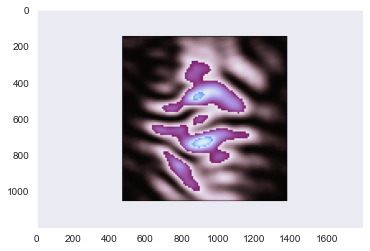

In [21]:
path = "/Users/takumi/Documents/研究/D2NN/図/gz.png"
image = cv2.imread(path, -1)
alpha = 255*3 - image[:,:,0] - image[:,:,1] - image[:,:,2]
alpha = np.round(alpha)
image[:,:,3] = alpha
plt.imshow(image)
plt.grid(False)

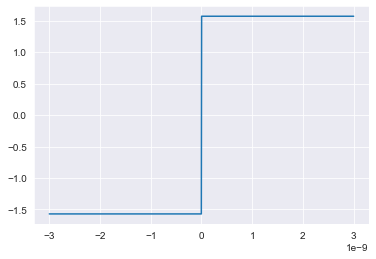

In [10]:
x = np.linspace(-3.0e-9, 3.0e-9, 1000)
y = tf.math.atan(x/(x**2 + 1.0e-24))
plt.plot(x, y.numpy())